In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
import xarray as xr

In [3]:
cam = xr.open_dataset("cam.nc", decode_times=False)
cam.time.attrs['units'] = 'days since 1999-09-12 00:00:00'
cam = xr.decode_cf(cam)


truth = xr.open_dataset("epic_renamed.nc", decode_times=False)
truth.tsec.attrs['units'] = 'seconds since 1999-09-12'
truth = xr.decode_cf(truth)

/Users/noah/anaconda/lib/python3.6/site-packages/xarray/conventions.py:838: UserWarning: CF decoding is overwriting dtype
  warnings.warn("CF decoding is overwriting dtype")


Fix units of precip

In [4]:
truth['prec'] = truth.prec*24

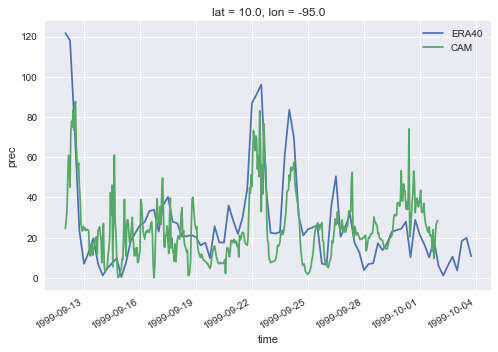

In [5]:
truth.prec.plot(label='ERA40')
((cam.PRECC+cam.PRECL)*86400 * 1000 ).plot(label='CAM')
plt.legend()

In [9]:
def plot_q(x):
    q_levels = 2.5*np.arange(10)
    plt.figure(figsize=(8,4), dpi=100)
    cs = x.plot.contour(levels=q_levels)
    x.plot.contourf(levels=q_levels)
    plt.clabel(cs, q_levels, colors='w', fmt='%1.1f')
    plt.gca().invert_yaxis()
    plt.xticks(rotation=30)

Here is the humidity from the IOP data:

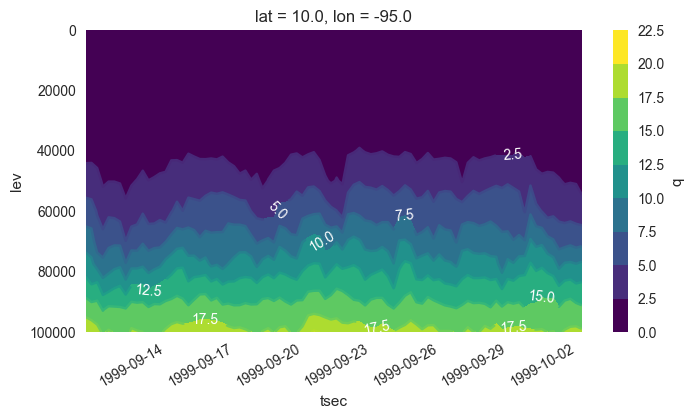

In [10]:
plot_q(truth.q.T.squeeze() * 1000)

This is the humidity from the CAM single column model:

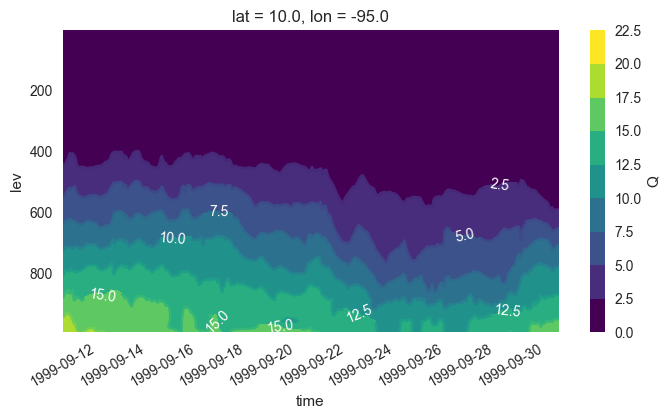

In [11]:
plot_q(cam.Q.T.squeeze() * 1000)